# architecture 1 with SVHN dataset

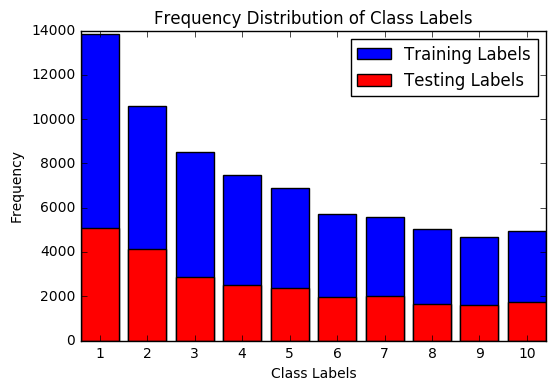

73257 Images with 32 x 32 
Instructions for updating:
Use `tf.global_variables_initializer` instead.
Initialized
Minibatch loss at step 0: 7.409079
Minibatch accuracy: 6.2%
Minibatch loss at step 50: 2.552974
Minibatch accuracy: 6.2%
Minibatch loss at step 100: 2.217019
Minibatch accuracy: 12.5%
Minibatch loss at step 150: 2.267467
Minibatch accuracy: 12.5%
Minibatch loss at step 200: 2.449726
Minibatch accuracy: 6.2%
Minibatch loss at step 250: 2.311006
Minibatch accuracy: 6.2%
Minibatch loss at step 300: 2.116477
Minibatch accuracy: 25.0%
Minibatch loss at step 350: 2.311157
Minibatch accuracy: 25.0%
Minibatch loss at step 400: 2.126116
Minibatch accuracy: 25.0%
Minibatch loss at step 450: 2.573571
Minibatch accuracy: 12.5%
Minibatch loss at step 500: 1.547323
Minibatch accuracy: 50.0%
Minibatch loss at step 550: 1.756100
Minibatch accuracy: 50.0%
Minibatch loss at step 600: 1.840487
Minibatch accuracy: 37.5%
Minibatch loss at step 650: 1.782119
Minibatch accuracy: 37.5%
Minibatch lo

In [8]:
# source: https://github.com/arpitgogia/ImageRecognition/blob/master/main.py
# accuracy: 88%
import tensorflow as tf 
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.linear_model import SGDClassifier
#==================EXTRACTING AND ANALYSING DATA FROM .mat FILES===============
"""
X and Y Components of Training and Testing Data
"""
train_data = scipy.io.loadmat('data/svhn_cropped/train_32x32.mat')['X']
train_labels = scipy.io.loadmat('data/svhn_cropped/train_32x32.mat')['y']
test_data = scipy.io.loadmat('data/svhn_cropped/test_32x32.mat')['X']
test_labels = scipy.io.loadmat('data/svhn_cropped/test_32x32.mat')['y']
shape_train = train_data.shape
shape_test = test_data.shape
"""
Plotting Class Labels against their respective frequencies in a Bar Graph
"""
temp_labels = train_labels.reshape(73257).tolist()
temp_labels = dict(Counter(temp_labels))
plt.bar(range(len(temp_labels)), temp_labels.values(), align='center', label='Training Labels')
plt.xticks(range(len(temp_labels)), temp_labels.keys())
temp_labels = test_labels.reshape(26032).tolist()
temp_labels = dict(Counter(temp_labels))
plt.bar(range(len(temp_labels)), temp_labels.values(), align='center', color='red', label='Testing Labels')
plt.legend()
plt.xlabel('Class Labels')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Class Labels')
plt.show()
#============================================================================


# print shape_train[3], "Images with", shape_train[0], "x", shape_train[0], "RGB grid"
print("%d Images with %d x %d " % (shape_train[3], shape_train[0], shape_train[0]))

#==================NORMALISATION AND PREPROCESSING=============================================

train_data = train_data.astype('float32') / 128.0 - 1
test_data = test_data.astype('float32') / 128.0 - 1


"""
Converting Labels to One Hot Encoding and Image Matrix to favourable dimensions
"""
def reformat(data, Y):
    xtrain = []
    trainLen = data.shape[3]
    for x in range(trainLen):
        xtrain.append(data[:,:,:,x])
    xtrain = np.asarray(xtrain)
    Ytr=[]
    for el in Y:
        temp=np.zeros(10)
        if el==10:
            temp[0]=1
        elif el==1:
            temp[1]=1
        elif el==2:
            temp[2]=1
        elif el==3:
            temp[3]=1
        elif el==4:
            temp[4]=1
        elif el==5:
            temp[5]=1
        elif el==6:
            temp[6]=1
        elif el==7:
            temp[7]=1
        elif el==8:
            temp[8]=1
        elif el==9:
            temp[9]=1
        Ytr.append(temp)
    return xtrain, np.asarray(Ytr)

train_data, train_labels = reformat(train_data, train_labels)
test_data, test_labels = reformat(test_data, test_labels)


#============================================================================

#==================BUILDING THE CNN==========================================
"""
Various Hyperparameters required for training the CNN.
"""
image_size = 32
width = 32
height = 32
channels = 3

n_labels = 10
patch = 5
depth = 16
hidden = 128
dropout = 0.9375

batch = 16
learning_rate = 0.001

"""
Constructing the placeholders and variables in the TensorFlow Graph
"""
# Training Dataset
tf_train_dataset = tf.placeholder(tf.float32, shape=(None, width, height, channels))
# Training Labels
tf_train_labels = tf.placeholder(tf.float32, shape=(None, n_labels))
# Testing Dataset
tf_test_dataset = tf.constant(test_data)

#   Layer 1: (5, 5, 3, 16)
layer1_weights = tf.Variable(tf.truncated_normal([patch, patch, channels, depth], stddev=0.1))
layer1_biases = tf.Variable(tf.constant(1.0, shape=[depth]))

#   Layer 2: (5, 5, 16, 16)
layer2_weights = tf.Variable(tf.truncated_normal([patch, patch, depth, depth], stddev=0.1))
layer2_biases = tf.Variable(tf.constant(1.0, shape=[depth]))

#   Layer 3: (1024, 128)
layer3_weights = tf.Variable(tf.truncated_normal([image_size // 4 * image_size // 4 * depth, hidden], stddev=0.1))
layer3_biases = tf.Variable(tf.constant(1.0, shape=[hidden]))

#   Layer 4: (128, 10)
layer4_weights = tf.Variable(tf.truncated_normal([hidden, n_labels], stddev=0.1))
layer4_biases = tf.Variable(tf.constant(1.0, shape=[n_labels]))

dropout = tf.placeholder(tf.float32)

def model(data):
    #   Convolution 1 and RELU
    conv1 = tf.nn.conv2d(data, layer1_weights, [1, 1, 1, 1], padding='SAME')
    hidden1 = tf.nn.relu(conv1 + layer1_biases)
    #   Max Pool
    hidden2 = tf.nn.max_pool(hidden1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
    #   Convolution 2 and RELU
    conv2 = tf.nn.conv2d(hidden2, layer2_weights, [1, 1, 1, 1], padding='SAME')
    hidden3 = tf.nn.relu(conv2 + layer2_biases)
    #   Max Pool
    hidden4 = tf.nn.max_pool(hidden3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

    shape = hidden4.get_shape().as_list()

    reshape = tf.reshape(hidden4, [-1, shape[1] * shape[2] * shape[3]])
    hidden5 = tf.nn.relu(tf.matmul(reshape, layer3_weights) + layer3_biases)
    #   Dropout
    dropout_layer = tf.nn.dropout(hidden5, 0.93)
    
    return tf.matmul(dropout_layer, layer4_weights) + layer4_biases

logits = model(tf_train_dataset)
# bug here 
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=tf_train_labels))
optimizer = tf.train.AdamOptimizer(0.001).minimize(loss)

train_prediction = tf.nn.softmax(logits)
test_prediction = tf.nn.softmax(model(tf_test_dataset))
#============================================================================

#==================TRAINING AND TESTING THE MODEL============================
"""
Accuracy function defined similar to the one taught in the Udacity Deep Learning Course
Returns percentage of correct predictions by verifying with Labels
"""
def accuracy(predictions, labels):
    return (100.0 * np.sum(np.argmax(predictions, 1) == np.argmax(labels, 1))
          / predictions.shape[0])

#   Number of iterations
num_steps = 10000

with tf.Session() as session:
    tf.initialize_all_variables().run()
    print('Initialized')
    average = 0
    for step in range(num_steps):
        #   Constucting the batch from the data set
        offset = (step * batch) % (train_labels.shape[0] - batch)
        batch_data = train_data[offset:(offset + batch), :, :, :]
        batch_labels = train_labels[offset:(offset + batch), :]
        #   Dictionary to be fed to TensorFlow Session
        feed_dict = {tf_train_dataset : batch_data, tf_train_labels : batch_labels, dropout: 0.93}
        _, l, predictions = session.run([optimizer, loss, train_prediction], feed_dict=feed_dict)
        #   Calculating the Accuracy of the predictions
        accu = accuracy(predictions, batch_labels)
        if (step % 50 == 0):
            print('Minibatch loss at step %d: %f' % (step, l))
            print('Minibatch accuracy: %.1f%%' % accu)
        average += accu
    print("Average Accuracy : %f " % (average / num_steps))
    print("END OF TRAINING")

      # Test trained model
    correct_prediction = tf.equal(tf.argmax(test_prediction, 1), tf.argmax(test_labels, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print(session.run(accuracy))
    print("END OF TESTING")
#    average = 0
#     for step in range(num_steps):
#         #   Constucting the batch from the data set
#         offset = (step * batch) % (test_labels.shape[0] - batch)
#         batch_data = test_data[offset:(offset + batch), :, :, :]
#         batch_labels = test_labels[offset:(offset + batch), :]
#         #   Dictionary to be fed to TensorFlow Session
#         feed_dict = {tf_train_dataset : batch_data, tf_train_labels : batch_labels, dropout: 0.93}
#         _, l, predictions = session.run([optimizer, loss, test_prediction], feed_dict=feed_dict)
#         #   Calculating the Accuracy of the predictions
#         accu = accuracy(predictions, batch_labels)
#         if (step % 50 == 0):
#             print('Minibatch loss at step %d: %f' % (step, l))
#             print('Minibatch accuracy: %.1f%%' % accu)
#         average += accu
#     print("Average Accuracy : %f " % (average / num_steps))
     

# use the same model architecture to train on MNIST: result isn't good

In [9]:
# source: https://github.com/arpitgogia/ImageRecognition/blob/master/main.py
# accuracy: 88%
import tensorflow as tf 
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter


from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
train_data = mnist.train.images
train_labels = mnist.train.labels
test_data = mnist.test.images
test_labels = mnist.test.labels
shape_train = train_data.shape
shape_test = test_data.shape
print(shape_train)
print(shape_test)
print(train_labels.shape)
print("after reshape: ")
train_data = train_data.reshape(len(train_data), 28, 28, 1)
test_data = test_data.reshape(len(test_data), 28, 28, 1)
shape_train = train_data.shape
shape_test = test_data.shape
print(shape_train)
print(shape_test)
# """
# Plotting Class Labels against their respective frequencies in a Bar Graph
# """
# temp_labels = train_labels.reshape(73257).tolist()
# temp_labels = dict(Counter(temp_labels))
# plt.bar(range(len(temp_labels)), temp_labels.values(), align='center', label='Training Labels')
# plt.xticks(range(len(temp_labels)), temp_labels.keys())
# temp_labels = test_labels.reshape(26032).tolist()
# temp_labels = dict(Counter(temp_labels))
# plt.bar(range(len(temp_labels)), temp_labels.values(), align='center', color='red', label='Testing Labels')
# plt.legend()
# plt.xlabel('Class Labels')
# plt.ylabel('Frequency')
# plt.title('Frequency Distribution of Class Labels')
# plt.show()
#============================================================================


# print shape_train[3], "Images with", shape_train[0], "x", shape_train[0], "RGB grid"
# print("%d Images with %d x %d " % (shape_train[3], shape_train[0], shape_train[0]))

#==================NORMALISATION AND PREPROCESSING=============================================
# do I need to do normalization here? why - 1?
train_data = train_data.astype('float32') / 128.0 - 1
test_data = test_data.astype('float32') / 128.0 - 1


"""
Converting Labels to One Hot Encoding and Image Matrix to favourable dimensions
"""
def reformat(data, Y):
    xtrain = []
    trainLen = data.shape[3]
    for x in range(trainLen):
        xtrain.append(data[:,:,:,x])
    xtrain = np.asarray(xtrain)
    Ytr=[]
    for el in Y:
        temp=np.zeros(10)
        if el==10:
            temp[0]=1
        elif el==1:
            temp[1]=1
        elif el==2:
            temp[2]=1
        elif el==3:
            temp[3]=1
        elif el==4:
            temp[4]=1
        elif el==5:
            temp[5]=1
        elif el==6:
            temp[6]=1
        elif el==7:
            temp[7]=1
        elif el==8:
            temp[8]=1
        elif el==9:
            temp[9]=1
        Ytr.append(temp)
    return xtrain, np.asarray(Ytr)

# train_data, train_labels = reformat(train_data, train_labels)
# test_data, test_labels = reformat(test_data, test_labels)


#============================================================================

#==================BUILDING THE CNN==========================================
"""
Various Hyperparameters required for training the CNN.
"""
image_size = 28
width = 28
height = 28
# channels = 3
# for MNISt channels = 1
channels = 1

n_labels = 10
patch = 5
depth = 16
hidden = 128
dropout = 0.9375

batch = 128
learning_rate = 0.001

"""
Constructing the placeholders and variables in the TensorFlow Graph
"""
#Training Dataset
tf_train_dataset = tf.placeholder(tf.float32, shape=(None, width, height, channels))
#Training Labels
tf_train_labels = tf.placeholder(tf.float32, shape=(None, n_labels))
#Testing Dataset
tf_test_dataset = tf.constant(test_data)

#   Layer 1: (5, 5, 3, 16)
layer1_weights = tf.Variable(tf.truncated_normal([patch, patch, channels, depth], stddev=0.1))
layer1_biases = tf.Variable(tf.constant(1.0, shape=[depth]))

#   Layer 2: (5, 5, 16, 16)
layer2_weights = tf.Variable(tf.truncated_normal([patch, patch, depth, depth], stddev=0.1))
layer2_biases = tf.Variable(tf.constant(1.0, shape=[depth]))

#   Layer 3: (1024, 128)
layer3_weights = tf.Variable(tf.truncated_normal([image_size // 4 * image_size // 4 * depth, hidden], stddev=0.1))
layer3_biases = tf.Variable(tf.constant(1.0, shape=[hidden]))

#   Layer 4: (128, 10)
layer4_weights = tf.Variable(tf.truncated_normal([hidden, n_labels], stddev=0.1))
layer4_biases = tf.Variable(tf.constant(1.0, shape=[n_labels]))

dropout = tf.placeholder(tf.float32)

def model(data):
    #   Convolution 1 and RELU
    conv1 = tf.nn.conv2d(data, layer1_weights, [1, 1, 1, 1], padding='SAME')
    hidden1 = tf.nn.relu(conv1 + layer1_biases)
    #   Max Pool
    hidden2 = tf.nn.max_pool(hidden1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
    #   Convolution 2 and RELU
    conv2 = tf.nn.conv2d(hidden2, layer2_weights, [1, 1, 1, 1], padding='SAME')
    hidden3 = tf.nn.relu(conv2 + layer2_biases)
    #   Max Pool
    hidden4 = tf.nn.max_pool(hidden3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

    shape = hidden4.get_shape().as_list()

    reshape = tf.reshape(hidden4, [-1, shape[1] * shape[2] * shape[3]])
    hidden5 = tf.nn.relu(tf.matmul(reshape, layer3_weights) + layer3_biases)
    #   Dropout
    dropout_layer = tf.nn.dropout(hidden5, 0.5)
    
    return tf.matmul(dropout_layer, layer4_weights) + layer4_biases

logits = model(tf_train_dataset)
# bug here 
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=tf_train_labels))
optimizer = tf.train.AdamOptimizer(0.0001).minimize(loss)

train_prediction = tf.nn.softmax(logits)
test_prediction = tf.nn.softmax(model(tf_test_dataset))
#============================================================================

#==================TRAINING AND TESTING THE MODEL============================
"""
Accuracy function defined similar to the one taught in the Udacity Deep Learning Course
Returns percentage of correct predictions by verifying with Labels
"""
def accuracy(predictions, labels):
    return (100.0 * np.sum(np.argmax(predictions, 1) == np.argmax(labels, 1))
          / predictions.shape[0])

#   Number of iterations
num_steps = 10000

with tf.Session() as session:
    tf.initialize_all_variables().run()
    print('Initialized')
    average = 0
    for step in range(num_steps):
        #   Constucting the batch from the data set
        offset = (step * batch) % (train_labels.shape[0] - batch)
        batch_data = train_data[offset:(offset + batch), :, :, :]
        batch_labels = train_labels[offset:(offset + batch), :]
        #   Dictionary to be fed to TensorFlow Session
        feed_dict = {tf_train_dataset : batch_data, tf_train_labels : batch_labels, dropout: 0.93}
        _, l, predictions = session.run([optimizer, loss, train_prediction], feed_dict=feed_dict)
        #   Calculating the Accuracy of the predictions
        accu = accuracy(predictions, batch_labels)
        if (step % 50 == 0):
            print('Minibatch loss at step %d: %f' % (step, l))
            print('Minibatch accuracy: %.1f%%' % accu)
        average += accu
    print("Average Accuracy : %f " % (average / num_steps))
    print("END OF TRAINING")
    
    correct_prediction = tf.equal(tf.argmax(test_prediction, 1), tf.argmax(test_labels, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    acc = session.run(accuracy)
    print(acc)
    print("Average Accuracy : %d " % acc)
    print("END OF TESTING")

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
(55000, 784)
(10000, 784)
(55000, 10)
after reshape: 
(55000, 28, 28, 1)
(10000, 28, 28, 1)
Instructions for updating:
Use `tf.global_variables_initializer` instead.
Initialized
Minibatch loss at step 0: 11.371773
Minibatch accuracy: 10.2%
Minibatch loss at step 50: 3.096071
Minibatch accuracy: 14.1%
Minibatch loss at step 100: 2.419096
Minibatch accuracy: 7.8%
Minibatch loss at step 150: 2.306524
Minibatch accuracy: 11.7%
Minibatch loss at step 200: 2.313264
Minibatch accuracy: 5.5%
Minibatch loss at step 250: 2.300894
Minibatch accuracy: 12.5%
Minibatch loss at step 300: 2.302557
Minibatch accuracy: 9.4%
Minibatch loss at step 350: 2.302116
Minibatch accuracy: 13.3%
Minibatch loss at step 400: 2.302770
Minibatch accuracy: 9.4%
Minibatch loss at step 450: 2.301948
Minibatch accuracy: 14.1%
Mini

KeyboardInterrupt: 

In [10]:
# type(accuracy.value)
type(session.run(accuracy))
accuracy.eval()

RuntimeError: Attempted to use a closed Session.

# MNIST best model

In [10]:
# test accuracy 0.9915 with advnaced model
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
train_data = mnist.train.images
train_labels = mnist.train.labels
test_data = mnist.test.images
test_labels = mnist.test.labels
shape_train = train_data.shape
shape_test = test_data.shape
print(shape_train)
print(shape_test)
print(train_labels.shape)
print("after reshape: ")
train_data = train_data.reshape(len(train_data), 28, 28, 1)
test_data = test_data.reshape(len(test_data), 28, 28, 1)
shape_train = train_data.shape
shape_test = test_data.shape
print(shape_train)
print(shape_test)

import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D, GaussianNoise, MaxoutDense
from keras.regularizers import l1, l2
from keras.optimizers import SGD
import matplotlib.pyplot as plt
import sys
import os
import time

# here are some settings for my network
batch_size = 32
nb_epoch = 10
img_size = 28
img_channels = 1
nb_classes = 10

model = Sequential()
model.add(Convolution2D(32, 5, 5, border_mode='same',
                        input_shape=(img_size, img_size, img_channels)))
model.add(Activation('relu'))
model.add(Convolution2D(64, 5, 5))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(64, 3, 3, border_mode='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1024))
model.add(Dropout(0.5))
model.add(Activation('relu'))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))


# sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


%time his = model.fit(train_data, train_labels, \
          batch_size=batch_size, \
          nb_epoch=nb_epoch, \
          validation_split=0.2, \
          shuffle=True) \

# evaluate our model
score = model.evaluate(test_data, test_labels, verbose=1)
print('\nTest loss: %.3f' % score[0])
print('Test accuracy: %.3f' % score[1])

# serialize model to JSON
model_json = model.to_json()
with open("mnist_model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("mnist_model.h5")
print("Saved model to disk")

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
(55000, 784)
(10000, 784)
(55000, 10)
after reshape: 
(55000, 28, 28, 1)
(10000, 28, 28, 1)
Train on 44000 samples, validate on 11000 samples
Epoch 1/10
44000/44000 [==============================] - 10s - loss: 0.1393 - acc: 0.9562 - val_loss: 0.0562 - val_acc: 0.9841
Epoch 2/10
44000/44000 [==============================] - 10s - loss: 0.0529 - acc: 0.9835 - val_loss: 0.0459 - val_acc: 0.9871
Epoch 3/10
44000/44000 [==============================] - 10s - loss: 0.0386 - acc: 0.9880 - val_loss: 0.0369 - val_acc: 0.9890
Epoch 4/10
44000/44000 [==============================] - 10s - loss: 0.0324 - acc: 0.9901 - val_loss: 0.0389 - val_acc: 0.9895
Epoch 5/10
44000/44000 [==============================] - 10s - loss: 0.0270 - acc: 0.9915 - val_loss: 0.0440 - val_acc: 0.9892
Epoch 6/10
44000/44000 [

# keras on SVHN

In [9]:
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D, GaussianNoise, MaxoutDense
from keras.regularizers import l1, l2
from keras.optimizers import SGD
import matplotlib.pyplot as plt
import sys
import os
import time
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

train_data = scipy.io.loadmat('data/svhn_cropped/train_32x32.mat')['X']
train_labels = scipy.io.loadmat('data/svhn_cropped/train_32x32.mat')['y']
test_data = scipy.io.loadmat('data/svhn_cropped/test_32x32.mat')['X']
test_labels = scipy.io.loadmat('data/svhn_cropped/test_32x32.mat')['y']

shape_train = train_data.shape
shape_test = test_data.shape

# here are some settings for my network
batch_size = 32
nb_epoch = 10
img_size = 32
img_channels = 3
nb_classes = 10

train_data = train_data.astype('float32') / 128.0 - 1
test_data = test_data.astype('float32') / 128.0 - 1


"""
Converting Labels to One Hot Encoding and Image Matrix to favourable dimensions
"""
def reformat(data, Y):
    xtrain = []
    trainLen = data.shape[3]
    for x in range(trainLen):
        xtrain.append(data[:,:,:,x])
    xtrain = np.asarray(xtrain)
    Ytr=[]
    for el in Y:
        temp=np.zeros(10)
        if el==10:
            temp[0]=1
        elif el==1:
            temp[1]=1
        elif el==2:
            temp[2]=1
        elif el==3:
            temp[3]=1
        elif el==4:
            temp[4]=1
        elif el==5:
            temp[5]=1
        elif el==6:
            temp[6]=1
        elif el==7:
            temp[7]=1
        elif el==8:
            temp[8]=1
        elif el==9:
            temp[9]=1
        Ytr.append(temp)
    return xtrain, np.asarray(Ytr)

train_data, train_labels = reformat(train_data, train_labels)
test_data, test_labels = reformat(test_data, test_labels)

model = Sequential()
model.add(Convolution2D(32, 5, 5, border_mode='same',
                        input_shape=(img_size, img_size, img_channels)))
model.add(Activation('relu'))
model.add(Convolution2D(64, 5, 5))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(64, 3, 3, border_mode='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1024))
model.add(Dropout(0.5))
model.add(Activation('relu'))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))


# sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


%time his = model.fit(train_data, train_labels, \
          batch_size=batch_size, \
          nb_epoch=nb_epoch, \
          validation_split=0.2, \
          shuffle=True) \

# evaluate our model
score = model.evaluate(test_data, test_labels, verbose=1)
print('\nTest loss: %.3f' % score[0])
print('Test accuracy: %.3f' % score[1])



Train on 58605 samples, validate on 14652 samples
Epoch 1/10
58605/58605 [==============================] - 18s - loss: 0.8228 - acc: 0.7360 - val_loss: 0.4839 - val_acc: 0.8535
Epoch 2/10
58605/58605 [==============================] - 18s - loss: 0.4637 - acc: 0.8600 - val_loss: 0.3963 - val_acc: 0.8858
Epoch 3/10
58605/58605 [==============================] - 18s - loss: 0.3951 - acc: 0.8796 - val_loss: 0.3813 - val_acc: 0.8840
Epoch 4/10
58605/58605 [==============================] - 18s - loss: 0.3449 - acc: 0.8943 - val_loss: 0.3598 - val_acc: 0.8980
Epoch 5/10
58605/58605 [==============================] - 18s - loss: 0.3132 - acc: 0.9044 - val_loss: 0.3649 - val_acc: 0.8938
Epoch 6/10
58605/58605 [==============================] - 18s - loss: 0.2824 - acc: 0.9140 - val_loss: 0.3659 - val_acc: 0.8982
Epoch 7/10
58605/58605 [==============================] - 18s - loss: 0.2588 - acc: 0.9200 - val_loss: 0.3919 - val_acc: 0.8997
Epoch 8/10
58605/58605 [==============================

# keras pretrain on mnist, train on SVHN

In [13]:
from keras.models import model_from_json
svhn_train_data = scipy.io.loadmat('data/svhn_cropped/train_32x32.mat')['X']
svhn_train_labels = scipy.io.loadmat('data/svhn_cropped/train_32x32.mat')['y']
svhn_test_data = scipy.io.loadmat('data/svhn_cropped/test_32x32.mat')['X']
svhn_test_labels = scipy.io.loadmat('data/svhn_cropped/test_32x32.mat')['y']

shape_train = train_data.shape
shape_test = test_data.shape

with open('mnist_model.json', 'r') as json_file:
    loaded_model_json = json_file.read()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("mnist_model.h5")
print("Loaded model from disk")

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


%time his = model.fit(svhn_train_data, svhn_train_labels, \
          batch_size=batch_size, \
          nb_epoch=nb_epoch, \
          validation_split=0.2, \
          shuffle=True) \

# evaluate our model
score = model.evaluate(svhn_test_data, svhn_test_labels, verbose=1)
print('\nTest loss: %.3f' % score[0])
print('Test accuracy: %.3f' % score[1])


Loaded model from disk


ValueError: Error when checking model input: expected convolution2d_input_8 to have shape (None, 28, 28, 1) but got array with shape (32, 32, 3, 73257)

In [ ]:
# load json and create model
json_file = open('models/small_mammals_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model_whole = model_from_json(loaded_model_json)
# load weights into new model
model_whole.load_weights("models/small_mammals_model.h5")
print("Loaded model from disk")

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


%time his = model.fit(train_data, train_labels, \
          batch_size=batch_size, \
          nb_epoch=nb_epoch, \
          validation_split=0.2, \
          shuffle=True) \

# evaluate our model
score = model.evaluate(test_data, test_labels, verbose=1)
print('\nTest loss: %.3f' % score[0])
print('Test accuracy: %.3f' % score[1])


# restore the graph

In [1]:
import tensorflow as tf
with tf.Session() as sess:    
    saver = tf.train.import_meta_graph('mnist_model-10000.meta')
    saver.restore(sess,tf.train.latest_checkpoint('./'))
    print(tf.all_variables())
    # W_conv1 nto found
    print(sess.run(W_conv1))

INFO:tensorflow:Restoring parameters from ./mnist_model-10000
Instructions for updating:
Please use tf.global_variables instead.
[<tf.Variable 'Variable:0' shape=(5, 5, 3, 32) dtype=float32_ref>, <tf.Variable 'Variable_1:0' shape=(32,) dtype=float32_ref>, <tf.Variable 'Variable_2:0' shape=(5, 5, 32, 64) dtype=float32_ref>, <tf.Variable 'Variable_3:0' shape=(64,) dtype=float32_ref>, <tf.Variable 'Variable_4:0' shape=(4096, 1024) dtype=float32_ref>, <tf.Variable 'Variable_5:0' shape=(1024,) dtype=float32_ref>, <tf.Variable 'Variable_6:0' shape=(1024, 10) dtype=float32_ref>, <tf.Variable 'Variable_7:0' shape=(10,) dtype=float32_ref>, <tf.Variable 'beta1_power:0' shape=() dtype=float32_ref>, <tf.Variable 'beta2_power:0' shape=() dtype=float32_ref>, <tf.Variable 'Variable/Adam:0' shape=(5, 5, 3, 32) dtype=float32_ref>, <tf.Variable 'Variable/Adam_1:0' shape=(5, 5, 3, 32) dtype=float32_ref>, <tf.Variable 'Variable_1/Adam:0' shape=(32,) dtype=float32_ref>, <tf.Variable 'Variable_1/Adam_1:0' s

NameError: name 'W_conv1' is not defined

In [16]:
type(x_image[0, 0, 0, 0])

tensorflow.python.framework.ops.Tensor

# let's see if this model(architecture 2) can work well on SVHN, no pretraining

In [ ]:
# test accuracy 0.9915 with advnaced model
from __future__ import print_function
import tensorflow as tf 
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.linear_model import SGDClassifier
# from tensorflow.examples.tutorials.mnist import input_data
# mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
#==================EXTRACTING AND ANALYSING DATA FROM .mat FILES===============
"""
X and Y Components of Training and Testing Data
"""
train_data = scipy.io.loadmat('data/svhn_cropped/train_32x32.mat')['X']
train_labels = scipy.io.loadmat('data/svhn_cropped/train_32x32.mat')['y']
test_data = scipy.io.loadmat('data/svhn_cropped/test_32x32.mat')['X']
test_labels = scipy.io.loadmat('data/svhn_cropped/test_32x32.mat')['y']

shape_train = train_data.shape
shape_test = test_data.shape
"""
Plotting Class Labels against their respective frequencies in a Bar Graph
"""
temp_labels = train_labels.reshape(73257).tolist()
temp_labels = dict(Counter(temp_labels))
plt.bar(range(len(temp_labels)), temp_labels.values(), align='center', label='Training Labels')
plt.xticks(range(len(temp_labels)), temp_labels.keys())
temp_labels = test_labels.reshape(26032).tolist()
temp_labels = dict(Counter(temp_labels))
plt.bar(range(len(temp_labels)), temp_labels.values(), align='center', color='red', label='Testing Labels')
plt.legend()
plt.xlabel('Class Labels')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Class Labels')
plt.show()
#============================================================================


# print shape_train[3], "Images with", shape_train[0], "x", shape_train[0], "RGB grid"
print("%d Images with %d x %d " % (shape_train[3], shape_train[0], shape_train[0]))

#==================NORMALISATION AND PREPROCESSING=============================================

image_size = 32
width = 32
height = 32
channels = 3

n_labels = 10
patch = 5
depth = 16
hidden = 128
dropout = 0.9375

batch = 16
learning_rate = 0.001

train_data = train_data.astype('float32') / 128.0 - 1
test_data = test_data.astype('float32') / 128.0 - 1


"""
Converting Labels to One Hot Encoding and Image Matrix to favourable dimensions
"""
def reformat(data, Y):
    xtrain = []
    trainLen = data.shape[3]
    for x in range(trainLen):
        xtrain.append(data[:,:,:,x])
    xtrain = np.asarray(xtrain)
    Ytr=[]
    for el in Y:
        temp=np.zeros(10)
        if el==10:
            temp[0]=1
        elif el==1:
            temp[1]=1
        elif el==2:
            temp[2]=1
        elif el==3:
            temp[3]=1
        elif el==4:
            temp[4]=1
        elif el==5:
            temp[5]=1
        elif el==6:
            temp[6]=1
        elif el==7:
            temp[7]=1
        elif el==8:
            temp[8]=1
        elif el==9:
            temp[9]=1
        Ytr.append(temp)
    return xtrain, np.asarray(Ytr)

train_data, train_labels = reformat(train_data, train_labels)
test_data, test_labels = reformat(test_data, test_labels)

import tensorflow as tf

def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')
# bug
x  = tf.placeholder(tf.float32, [None, width, height, channels], name='x')
y_ = tf.placeholder(tf.float32, [None, 10],  name='y_')
# x_image = tf.reshape(x, [-1, 28, 28, 1])

# Convolutional layer 1
W_conv1 = weight_variable([5, 5, 3, 32])
b_conv1 = bias_variable([32])

h_conv1 = tf.nn.relu(conv2d(x, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)

# Convolutional layer 2
W_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])

h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)
print(h_pool2)
# Fully connected layer 1
# how do I get 7?
# reshape has issues here
h_pool2_flat = tf.reshape(h_pool2, [-1, 8*8*64])

# replace 7*7*64 by 65536
W_fc1 = weight_variable([8*8*64, 1024])
b_fc1 = bias_variable([1024])

h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

# Dropout
keep_prob  = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

# Fully connected layer 2 (Output layer) or,  you can call it a readout layer
W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])

y = tf.nn.softmax(tf.matmul(h_fc1_drop, W_fc2) + b_fc2, name='y')

# Evaluation functions
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))

correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32), name='accuracy')

# Training algorithm
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)

# initialize a save the save the model
saver = tf.train.Saver()

# Training steps
with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    for i in range(20000):
        # Constucting the batch from the data set
        offset = (i * batch) % (train_labels.shape[0] - batch)
        batch_data = train_data[offset:(offset + batch), :, :, :]
        batch_labels = train_labels[offset:(offset + batch), :]     
        
        # tracking training accuracy
        if i%100 == 0:
            train_accuracy = accuracy.eval(feed_dict={x: batch_data, y_: batch_labels, keep_prob: 1.0})
            print("step %d, training accuracy %g" % (i, train_accuracy))
        train_step.run(feed_dict={x: batch_data, y_: batch_labels, keep_prob: 0.5})

    print("test accuracy %g" % accuracy.eval(feed_dict={x: test_data, y_: test_labels, keep_prob: 1.0}))
    save_path = saver.save(sess, "/tmp/model_shvn.ckpt")
    print("Model saved in file: %s" % save_path)



# retrive prediction confidence by confidence

# pretrain on MNIST, then train on SVHN
# test pretrain effect error: different variable name

In [3]:
import tensorflow as tf 
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.linear_model import SGDClassifier

"""
X and Y Components of Training and Testing Data
"""
train_data = scipy.io.loadmat('data/svhn_cropped/train_32x32.mat')['X']
train_labels = scipy.io.loadmat('data/svhn_cropped/train_32x32.mat')['y']
test_data = scipy.io.loadmat('data/svhn_cropped/test_32x32.mat')['X']
test_labels = scipy.io.loadmat('data/svhn_cropped/test_32x32.mat')['y']

shape_train = train_data.shape
shape_test = test_data.shape
"""
Plotting Class Labels against their respective frequencies in a Bar Graph
"""
# temp_labels = train_labels.reshape(73257).tolist()
# temp_labels = dict(Counter(temp_labels))
# plt.bar(range(len(temp_labels)), temp_labels.values(), align='center', label='Training Labels')
# plt.xticks(range(len(temp_labels)), temp_labels.keys())
# temp_labels = test_labels.reshape(26032).tolist()
# temp_labels = dict(Counter(temp_labels))
# plt.bar(range(len(temp_labels)), temp_labels.values(), align='center', color='red', label='Testing Labels')
# plt.legend()
# plt.xlabel('Class Labels')
# plt.ylabel('Frequency')
# plt.title('Frequency Distribution of Class Labels')
# plt.show()
#============================================================================


# print shape_train[3], "Images with", shape_train[0], "x", shape_train[0], "RGB grid"
print("%d Images with size %d x %d " % (shape_train[3], shape_train[0], shape_train[0]))

#==================NORMALISATION AND PREPROCESSING=============================================

image_size = 32
width = 32
height = 32
channels = 3

n_labels = 10
patch = 5
depth = 16
hidden = 128
dropout = 0.9375

batch = 16
learning_rate = 0.001

train_data = train_data.astype('float32') / 128.0 - 1
test_data = test_data.astype('float32') / 128.0 - 1


"""
Converting Labels to One Hot Encoding and Image Matrix to favourable dimensions
"""
def reformat(data, Y):
    xtrain = []
    trainLen = data.shape[3]
    for x in range(trainLen):
        xtrain.append(data[:,:,:,x])
    xtrain = np.asarray(xtrain)
    Ytr=[]
    for el in Y:
        temp=np.zeros(10)
        if el==10:
            temp[0]=1
        elif el==1:
            temp[1]=1
        elif el==2:
            temp[2]=1
        elif el==3:
            temp[3]=1
        elif el==4:
            temp[4]=1
        elif el==5:
            temp[5]=1
        elif el==6:
            temp[6]=1
        elif el==7:
            temp[7]=1
        elif el==8:
            temp[8]=1
        elif el==9:
            temp[9]=1
        Ytr.append(temp)
    return xtrain, np.asarray(Ytr)

train_data, train_labels = reformat(train_data, train_labels)
test_data, test_labels = reformat(test_data, test_labels)

import tensorflow as tf

def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial, name='W')

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial, name='B')

def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')

x  = tf.placeholder(tf.float32, [None, width, height, channels], name='x')
y_ = tf.placeholder(tf.float32, [None, 10],  name='y_')


# Convolutional layer 1
with tf.name_scope('conv_1'):
    W_conv1 = weight_variable([5, 5, 3, 32])
    b_conv1 = bias_variable([32])

    h_conv1 = tf.nn.relu(conv2d(x, W_conv1) + b_conv1)
    h_pool1 = max_pool_2x2(h_conv1)

# Convolutional layer 2
with tf.name_scope('conv_2'):
    W_conv2 = weight_variable([5, 5, 32, 64])
    b_conv2 = bias_variable([64])

    h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
    h_pool2 = max_pool_2x2(h_conv2)

# Fully connected layer 1
with tf.name_scope('fc_1'):
    h_pool2_flat = tf.reshape(h_pool2, [-1, 8*8*64])

    W_fc1 = weight_variable([8*8*64, 1024])
    b_fc1 = bias_variable([1024])

    h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

# Dropout
keep_prob  = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

# Fully connected layer 2 (Output layer) or,  you can call it a readout layer
with tf.name_scope('fc_2'):
    W_fc2 = weight_variable([1024, 10])
    b_fc2 = bias_variable([10])

    y = tf.nn.softmax(tf.matmul(h_fc1_drop, W_fc2) + b_fc2, name='y')

# Evaluation functions
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))

correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32), name='accuracy')

# Training algorithm
# sine we are fintunning, we should try to use a smaller leanring rate
# train_step = tf.train.AdamOptimizer(1e-5, name='Adam').minimize(cross_entropy)

# initialize a save the save the model
saver = tf.train.Saver()
tf.all_variables()
# Training steps
with tf.Session() as sess:
    # saver.restore(sess, "/tmp/model_mnist.ckpt")
    # saver = tf.train.import_meta_graph('mnist_model-10000.meta')
    saver.restore(sess,tf.train.latest_checkpoint('./'))
    print("Model restored.")
    # sess.run(tf.initialize_all_variables())

    # Restore variables from disk.

    # Do some work with the model    
    for i in range(20000):
        # Constucting the batch from the data set
        offset = (i * batch) % (train_labels.shape[0] - batch)
        batch_data = train_data[offset:(offset + batch), :, :, :]
        batch_labels = train_labels[offset:(offset + batch), :]     
        
        # tracking training accuracy
        if i%100 == 0:
            train_accuracy = accuracy.eval(feed_dict={x: batch_data, y_: batch_labels, keep_prob: 1.0})
            print("step %d, training accuracy %g" % (i, train_accuracy))
        train_step.run(feed_dict={x: batch_data, y_: batch_labels, keep_prob: 0.5})

    print("test accuracy %g" % accuracy.eval(feed_dict={x: test_data, y_: test_labels, keep_prob: 1.0}))
    save_path = saver.save(sess, "pretrain_on_mnist_svhn_model", global_step=20000)
    print("Model saved in file: %s" % save_path)
#     max_steps = 20000
#     for step in range(max_steps):
#         batch_xs, batch_ys = mnist.train.next_batch(50)
#         if (step % 100) == 0:
#             print(step, sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels, keep_prob: 0.5}))
#         sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys, keep_prob: 0.5})
#     print(max_steps, sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0}))

73257 Images with size 32 x 32 


ValueError: At least two variables have the same name: Variable_15

# model loading sample code(might be for the older version)

In [ ]:
# Add ops to save and restore all the variables.
saver = tf.train.Saver()

# Later, launch the model, initialize the variables, do some work, save the
# variables to disk.
with tf.Session() as sess:
    sess.run(init_op)
    # Do some work with the model.
  
    # Save the variables to disk.
    save_path = saver.save(sess, "/tmp/model.ckpt")
    print("Model saved in file: %s" % save_path)

# Restoring Variables

# Add ops to save and restore all the variables.
saver = tf.train.Saver()

# Later, launch the model, use the saver to restore variables from disk, and
# do some work with the model.
with tf.Session() as sess:
    # Restore variables from disk.
    saver.restore(sess, "/tmp/model.ckpt")
    print("Model restored.")
    # Do some work with the model


# no model reconstruction

In [2]:
from __future__ import print_function
import tensorflow as tf 
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.linear_model import SGDClassifier
# from tensorflow.examples.tutorials.mnist import input_data
# mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
#==================EXTRACTING AND ANALYSING DATA FROM .mat FILES===============
"""
X and Y Components of Training and Testing Data
"""
train_data = scipy.io.loadmat('data/svhn_cropped/train_32x32.mat')['X']
train_labels = scipy.io.loadmat('data/svhn_cropped/train_32x32.mat')['y']
test_data = scipy.io.loadmat('data/svhn_cropped/test_32x32.mat')['X']
test_labels = scipy.io.loadmat('data/svhn_cropped/test_32x32.mat')['y']

shape_train = train_data.shape
shape_test = test_data.shape

"""
Plotting Class Labels against their respective frequencies in a Bar Graph
"""
# temp_labels = train_labels.reshape(73257).tolist()
# temp_labels = dict(Counter(temp_labels))
# plt.bar(range(len(temp_labels)), temp_labels.values(), align='center', label='Training Labels')
# plt.xticks(range(len(temp_labels)), temp_labels.keys())
# temp_labels = test_labels.reshape(26032).tolist()
# temp_labels = dict(Counter(temp_labels))
# plt.bar(range(len(temp_labels)), temp_labels.values(), align='center', color='red', label='Testing Labels')
# plt.legend()
# plt.xlabel('Class Labels')
# plt.ylabel('Frequency')
# plt.title('Frequency Distribution of Class Labels')
# plt.show()
#============================================================================


# print shape_train[3], "Images with", shape_train[0], "x", shape_train[0], "RGB grid"
print("%d Images with %d x %d " % (shape_train[3], shape_train[0], shape_train[0]))

#==================NORMALISATION AND PREPROCESSING=============================================

image_size = 32
width = 32
height = 32
channels = 3

n_labels = 10
patch = 5
depth = 16
hidden = 128
dropout = 0.9375

batch = 16
learning_rate = 0.001

train_data = train_data.astype('float32') / 128.0 - 1
test_data = test_data.astype('float32') / 128.0 - 1


"""
Converting Labels to One Hot Encoding and Image Matrix to favourable dimensions
"""
def reformat(data, Y):
    xtrain = []
    trainLen = data.shape[3]
    for x in range(trainLen):
        xtrain.append(data[:,:,:,x])
    xtrain = np.asarray(xtrain)
    Ytr=[]
    for el in Y:
        temp=np.zeros(10)
        if el==10:
            temp[0]=1
        elif el==1:
            temp[1]=1
        elif el==2:
            temp[2]=1
        elif el==3:
            temp[3]=1
        elif el==4:
            temp[4]=1
        elif el==5:
            temp[5]=1
        elif el==6:
            temp[6]=1
        elif el==7:
            temp[7]=1
        elif el==8:
            temp[8]=1
        elif el==9:
            temp[9]=1
        Ytr.append(temp)
    return xtrain, np.asarray(Ytr)

train_data, train_labels = reformat(train_data, train_labels)
test_data, test_labels = reformat(test_data, test_labels)

with tf.Session() as sess:
    # saver.restore(sess, "/tmp/model_mnist.ckpt")
    saver = tf.train.import_meta_graph('mnist_model-10000.meta')
    sess.run(tf.initialize_all_variables())
    saver.restore(sess,tf.train.latest_checkpoint('./'))
    x  = tf.placeholder(tf.float32, [None, width, height, channels], name='x')
    y_ = tf.placeholder(tf.float32, [None, 10],  name='y_')
    y = tf.nn.softmax(tf.matmul(h_fc1_drop, W_fc2) + b_fc2, name='y')
    # Evaluation functions
    cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))
    correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32), name='accuracy')

    # Training algorithm
    # sine we are fintunning, we should try to use a smaller leanring rate
    train_step = tf.train.AdamOptimizer(1e-5, name='Adam').minimize(cross_entropy)
    
    print("Model restored.")
    # sess.run(tf.initialize_all_variables())

    # Restore variables from disk.

    # Do some work with the model    
    for i in range(20000):
        # Constucting the batch from the data set
        offset = (i * batch) % (train_labels.shape[0] - batch)
        batch_data = train_data[offset:(offset + batch), :, :, :]
        batch_labels = train_labels[offset:(offset + batch), :]     
        
        # tracking training accuracy
        if i%100 == 0:
            train_accuracy = accuracy.eval(feed_dict={x: batch_data, y_: batch_labels, keep_prob: 1.0})
            print("step %d, training accuracy %g" % (i, train_accuracy))
        train_step.run(feed_dict={x: batch_data, y_: batch_labels, keep_prob: 0.5})

    print("test accuracy %g" % accuracy.eval(feed_dict={x: test_data, y_: test_labels, keep_prob: 1.0}))
    save_path = saver.save(sess, "pretrain_on_mnist_svhn_model", global_step=20000)
    print("Model saved in file: %s" % save_path)

73257 Images with 32 x 32 
Instructions for updating:
Use `tf.global_variables_initializer` instead.
INFO:tensorflow:Restoring parameters from ./mnist_model-10000


NameError: name 'h_fc1_drop' is not defined

# helper founction of visulization of Tensorboard on ipython notebook(figuring out why is it not showing)

In [13]:
# source: https://github.com/tensorflow/tensorflow/blob/master/tensorflow/examples/tutorials/deepdream/deepdream.ipynb
from IPython.display import clear_output, Image, display, HTML

def strip_consts(graph_def, max_const_size=32):
    """Strip large constant values from graph_def."""
    strip_def = tf.GraphDef()
    for n0 in graph_def.node:
        n = strip_def.node.add() 
        n.MergeFrom(n0)
        if n.op == 'Const':
            tensor = n.attr['value'].tensor
            size = len(tensor.tensor_content)
            if size > max_const_size:
                tensor.tensor_content = bytes("<stripped %d bytes>"%size, 'utf-8')
    return strip_def

def show_graph(graph_def, max_const_size=32):
    """Visualize TensorFlow graph."""
    if hasattr(graph_def, 'as_graph_def'):
        graph_def = graph_def.as_graph_def()
    strip_def = strip_consts(graph_def, max_const_size=max_const_size)
    code = """
        <script>
          function load() {{
            document.getElementById("{id}").pbtxt = {data};
          }}
        </script>
        <link rel="import" href="https://tensorboard.appspot.com/tf-graph-basic.build.html" onload=load()>
        <div style="height:600px">
          <tf-graph-basic id="{id}"></tf-graph-basic>
        </div>
    """.format(data=repr(str(strip_def)), id='graph'+str(np.random.rand()))

    iframe = """
        <iframe seamless style="width:1200px;height:620px;border:0" srcdoc="{}"></iframe>
    """.format(code.replace('"', '&quot;'))
    display(HTML(iframe))
    
# def variable_summaries(var):
#   """Attach a lot of summaries to a Tensor (for TensorBoard visualization)."""
#   with tf.name_scope('summaries'):
#     mean = tf.reduce_mean(var)
#     tf.summary.scalar('mean', mean)
#     with tf.name_scope('stddev'):
#       stddev = tf.sqrt(tf.reduce_mean(tf.square(var - mean)))
#     tf.summary.scalar('stddev', stddev)
#     tf.summary.scalar('max', tf.reduce_max(var))
#     tf.summary.scalar('min', tf.reduce_min(var))
#     tf.summary.histogram('histogram', var)

    
# show_graph(tf.get_default_graph().as_graph_def())

# If your graph is saved as pbtxt, you could do

# gdef = tf.GraphDef()
# from google.protobuf import text_format
# text_format.Merge(open("tf_persistent.pbtxt").read(), gdef)
# show_graph(gdef)

In [ ]:
# Copyright 2015 The TensorFlow Authors. All Rights Reserved.
#
# Licensed under the Apache License, Version 2.0 (the 'License');
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an 'AS IS' BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
# ==============================================================================
"""A simple MNIST classifier which displays summaries in TensorBoard.

 This is an unimpressive MNIST model, but it is a good example of using
tf.name_scope to make a graph legible in the TensorBoard graph explorer, and of
naming summary tags so that they are grouped meaningfully in TensorBoard.

It demonstrates the functionality of every TensorBoard dashboard.
"""
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import argparse
import sys

import tensorflow as tf

from tensorflow.examples.tutorials.mnist import input_data

FLAGS = None


def train():
  # Import data
  mnist = input_data.read_data_sets(FLAGS.data_dir,
                                    one_hot=True,
                                    fake_data=FLAGS.fake_data)

  sess = tf.InteractiveSession()
  # Create a multilayer model.

  # Input placeholders
  with tf.name_scope('input'):
    x = tf.placeholder(tf.float32, [None, 784], name='x-input')
    y_ = tf.placeholder(tf.float32, [None, 10], name='y-input')

  with tf.name_scope('input_reshape'):
    image_shaped_input = tf.reshape(x, [-1, 28, 28, 1])
    tf.summary.image('input', image_shaped_input, 10)

  # We can't initialize these variables to 0 - the network will get stuck.
  def weight_variable(shape):
    """Create a weight variable with appropriate initialization."""
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

  def bias_variable(shape):
    """Create a bias variable with appropriate initialization."""
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

  def variable_summaries(var):
    """Attach a lot of summaries to a Tensor (for TensorBoard visualization)."""
    with tf.name_scope('summaries'):
      mean = tf.reduce_mean(var)
      tf.summary.scalar('mean', mean)
      with tf.name_scope('stddev'):
        stddev = tf.sqrt(tf.reduce_mean(tf.square(var - mean)))
      tf.summary.scalar('stddev', stddev)
      tf.summary.scalar('max', tf.reduce_max(var))
      tf.summary.scalar('min', tf.reduce_min(var))
      tf.summary.histogram('histogram', var)

  def nn_layer(input_tensor, input_dim, output_dim, layer_name, act=tf.nn.relu):
    """Reusable code for making a simple neural net layer.

    It does a matrix multiply, bias add, and then uses relu to nonlinearize.
    It also sets up name scoping so that the resultant graph is easy to read,
    and adds a number of summary ops.
    """
    # Adding a name scope ensures logical grouping of the layers in the graph.
    with tf.name_scope(layer_name):
      # This Variable will hold the state of the weights for the layer
      with tf.name_scope('weights'):
        weights = weight_variable([input_dim, output_dim])
        variable_summaries(weights)
      with tf.name_scope('biases'):
        biases = bias_variable([output_dim])
        variable_summaries(biases)
      with tf.name_scope('Wx_plus_b'):
        preactivate = tf.matmul(input_tensor, weights) + biases
        tf.summary.histogram('pre_activations', preactivate)
      activations = act(preactivate, name='activation')
      tf.summary.histogram('activations', activations)
      return activations

  hidden1 = nn_layer(x, 784, 500, 'layer1')

  with tf.name_scope('dropout'):
    keep_prob = tf.placeholder(tf.float32)
    tf.summary.scalar('dropout_keep_probability', keep_prob)
    dropped = tf.nn.dropout(hidden1, keep_prob)

  # Do not apply softmax activation yet, see below.
  y = nn_layer(dropped, 500, 10, 'layer2', act=tf.identity)

  with tf.name_scope('cross_entropy'):
    # The raw formulation of cross-entropy,
    #
    # tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(tf.softmax(y)),
    #                               reduction_indices=[1]))
    #
    # can be numerically unstable.
    #
    # So here we use tf.nn.softmax_cross_entropy_with_logits on the
    # raw outputs of the nn_layer above, and then average across
    # the batch.
    diff = tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y)
    with tf.name_scope('total'):
      cross_entropy = tf.reduce_mean(diff)
  tf.summary.scalar('cross_entropy', cross_entropy)

  with tf.name_scope('train'):
    train_step = tf.train.AdamOptimizer(FLAGS.learning_rate).minimize(
        cross_entropy)

  with tf.name_scope('accuracy'):
    with tf.name_scope('correct_prediction'):
      correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
    with tf.name_scope('accuracy'):
      accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
  tf.summary.scalar('accuracy', accuracy)

  # Merge all the summaries and write them out to /tmp/tensorflow/mnist/logs/mnist_with_summaries (by default)
  merged = tf.summary.merge_all()
  train_writer = tf.summary.FileWriter(FLAGS.log_dir + '/train', sess.graph)
  test_writer = tf.summary.FileWriter(FLAGS.log_dir + '/test')
  tf.global_variables_initializer().run()

  # Train the model, and also write summaries.
  # Every 10th step, measure test-set accuracy, and write test summaries
  # All other steps, run train_step on training data, & add training summaries

  def feed_dict(train):
    """Make a TensorFlow feed_dict: maps data onto Tensor placeholders."""
    if train or FLAGS.fake_data:
      xs, ys = mnist.train.next_batch(100, fake_data=FLAGS.fake_data)
      k = FLAGS.dropout
    else:
      xs, ys = mnist.test.images, mnist.test.labels
      k = 1.0
    return {x: xs, y_: ys, keep_prob: k}

  for i in range(FLAGS.max_steps):
    if i % 100 == 0:  # Record summaries and test-set accuracy
      summary, acc = sess.run([merged, accuracy], feed_dict=feed_dict(False))
      test_writer.add_summary(summary, i)
      print('Accuracy at step %s: %s' % (i, acc))
    else:  # Record train set summaries, and train
      if i % 100 == 99:  # Record execution stats
        run_options = tf.RunOptions(trace_level=tf.RunOptions.FULL_TRACE)
        run_metadata = tf.RunMetadata()
        summary, _ = sess.run([merged, train_step],
                              feed_dict=feed_dict(True),
                              options=run_options,
                              run_metadata=run_metadata)
        train_writer.add_run_metadata(run_metadata, 'step%03d' % i)
        train_writer.add_summary(summary, i)
        print('Adding run metadata for', i)
      else:  # Record a summary
        summary, _ = sess.run([merged, train_step], feed_dict=feed_dict(True))
        train_writer.add_summary(summary, i)
  train_writer.close()
  test_writer.close()


def main(_):
  if tf.gfile.Exists(FLAGS.log_dir):
    tf.gfile.DeleteRecursively(FLAGS.log_dir)
  tf.gfile.MakeDirs(FLAGS.log_dir)
  train()


if __name__ == '__main__':
  parser = argparse.ArgumentParser()
  parser.add_argument('--fake_data', nargs='?', const=True, type=bool,
                      default=False,
                      help='If true, uses fake data for unit testing.')
  parser.add_argument('--max_steps', type=int, default=100,
                      help='Number of steps to run trainer.')
  parser.add_argument('--learning_rate', type=float, default=0.001,
                      help='Initial learning rate')
  parser.add_argument('--dropout', type=float, default=0.9,
                      help='Keep probability for training dropout.')
  parser.add_argument('--data_dir', type=str, default='/tmp/tensorflow/mnist/input_data',
                      help='Directory for storing input data')
  parser.add_argument('--log_dir', type=str, default='/tmp/tensorflow/mnist/logs/mnist_with_summaries',
                      help='Summaries log directory')
  FLAGS, unparsed = parser.parse_known_args()
  tf.app.run(main=main, argv=[sys.argv[0]] + unparsed)


Extracting /tmp/tensorflow/mnist/input_data/train-images-idx3-ubyte.gz
Extracting /tmp/tensorflow/mnist/input_data/train-labels-idx1-ubyte.gz
Extracting /tmp/tensorflow/mnist/input_data/t10k-images-idx3-ubyte.gz
Extracting /tmp/tensorflow/mnist/input_data/t10k-labels-idx1-ubyte.gz
Accuracy at step 0: 0.0854
